In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

pd.options.display.max_columns = 30

Dataset source: https://www.kaggle.com/datasets/maharshipandya/-spotify-tracks-dataset

## 1.EDA

In [2]:
df = pd.read_csv('spotify.csv')

In [3]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
df.drop(['Unnamed: 0', 'track_id'], axis = 1, inplace = True)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           113999 non-null  object 
 1   album_name        113999 non-null  object 
 2   track_name        113999 non-null  object 
 3   popularity        114000 non-null  int64  
 4   duration_ms       114000 non-null  int64  
 5   explicit          114000 non-null  bool   
 6   danceability      114000 non-null  float64
 7   energy            114000 non-null  float64
 8   key               114000 non-null  int64  
 9   loudness          114000 non-null  float64
 10  mode              114000 non-null  int64  
 11  speechiness       114000 non-null  float64
 12  acousticness      114000 non-null  float64
 13  instrumentalness  114000 non-null  float64
 14  liveness          114000 non-null  float64
 15  valence           114000 non-null  float64
 16  tempo             11

In [6]:
# Remove only 1 NA row 
df.dropna(axis=0)

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music
113998,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,-10.889,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music


In [7]:
df2 = df.copy() #for classification later

In [5]:
# Change data type to proper type
df[['key', 'mode', 'time_signature']] = df[['key', 'mode', 'time_signature']].astype(object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 81344 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           81343 non-null  object 
 1   album_name        81343 non-null  object 
 2   track_name        81343 non-null  object 
 3   popularity        81344 non-null  int64  
 4   duration_ms       81344 non-null  int64  
 5   explicit          81344 non-null  bool   
 6   danceability      81344 non-null  float64
 7   energy            81344 non-null  float64
 8   key               81344 non-null  int64  
 9   loudness          81344 non-null  float64
 10  mode              81344 non-null  int64  
 11  speechiness       81344 non-null  float64
 12  acousticness      81344 non-null  float64
 13  instrumentalness  81344 non-null  float64
 14  liveness          81344 non-null  float64
 15  valence           81344 non-null  float64
 16  tempo             81344 non-null  float

In [20]:
# Find which genres have most songs
df.groupby('track_genre')['track_genre'].count().sort_values(ascending = False).head(10)

track_genre
acoustic             1000
punk                 1000
progressive-house    1000
power-pop            1000
pop-film             1000
pop                  1000
piano                1000
party                1000
pagode               1000
opera                1000
Name: track_genre, dtype: int64

<AxesSubplot:ylabel='track_genre'>

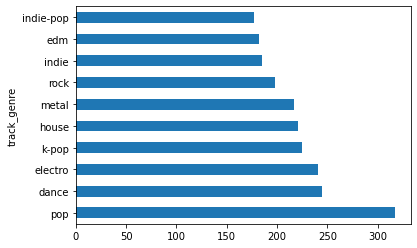

In [22]:
# Find which genres that popular songs likely to be 
df.loc[df['popularity'] >=70].groupby('track_genre')['track_genre'].count().sort_values(ascending = False).head(10).plot.barh()

In [10]:
# Find the top artists and tracks from pop genre 
df.loc[df['track_genre'] == 'pop'][['artists', 'track_name', 'popularity']].sort_values('popularity', ascending = False).head(10)

,artists,track_name,popularity
81051,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100
81210,David Guetta;Bebe Rexha,I'm Good (Blue),98
81003,Chris Brown,Under The Influence,96
81174,OneRepublic,I Ain't Worried,96
81052,Harry Styles,As It Was,95
81102,Joji,Glimpse of Us,94
81861,Tom Odell,Another Love,93
81853,The Neighbourhood,Sweater Weather,93
81100,Rema;Selena Gomez,Calm Down (with Selena Gomez),92
81024,Charlie Puth;Jung Kook;BTS,Left and Right (Feat. Jung Kook of BTS),92


In [11]:
# Find the top artists and tracks from dance genre 
df.loc[df['track_genre'] == 'dance'][['artists','track_name', 'popularity']].sort_values('popularity', ascending = False).head(10)

,artists,track_name,popularity
20001,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),100
20008,David Guetta;Bebe Rexha,I'm Good (Blue),98
20000,Chris Brown,Under The Influence,96
20850,Beyoncé,CUFF IT,93
20017,Charlie Puth;Jung Kook;BTS,Left and Right (Feat. Jung Kook of BTS),92
20410,Nicki Minaj,Super Freaky Girl,92
20811,James Hype;Miggy Dela Rosa,Ferrari,90
20200,Doja Cat,Vegas (From the Original Motion Picture Soundt...,90
20014,Calvin Harris;Dua Lipa,One Kiss (with Dua Lipa),89
20950,Sam Smith,I'm Not The Only One,88


In [12]:
# Create number of songs column
df['noOfSongs'] = df.groupby('artists')['artists'].transform('count')

In [13]:
# Create sub data frame for artists that have been producing lots of songs
ProductiveArtist = df.loc[df['noOfSongs']>=25]

In [14]:
# Find which productive artist group have most song number
ProductiveArtist.groupby('artists')[['noOfSongs']].mean().sort_values('noOfSongs', ascending = False).head(10)

,noOfSongs
artists,
The Beatles,279.0
George Jones,271.0
Stevie Wonder,236.0
Linkin Park,224.0
Ella Fitzgerald,222.0
Prateek Kuhad,217.0
Feid,202.0
Chuck Berry,190.0
Håkan Hellström,183.0


In [15]:
# Find which productive artist group have most popularity
ProductiveArtist.groupby('artists')[['popularity']].mean().sort_values('popularity', ascending = False).head(10)

,popularity
artists,
Bad Bunny,87.083333
The Neighbourhood,75.875000
Halsey,72.755556
Eagles,71.962963
BLACKPINK,71.413043
The 1975,70.833333
AC/DC,69.593750
Metallica,69.224490
Foo Fighters,69.057143


In [16]:
# Find which artist has most explicit song 
df[df['explicit'] == True].groupby('artists')[['noOfSongs']].count().sort_values('noOfSongs', ascending = False).head(10)

,noOfSongs
artists,
Jack Harlow,71
Jhayco;Bad Bunny,64
Marilyn Manson,61
XXXTENTACION,59
Daddy Yankee;Bad Bunny,58
Vybz Kartel,54
Asspera,51
Jhayco,46
Alejo;Feid;ROBI,44


## 2. Regression

In [17]:
# Create new df for regression 
song = df.iloc[:, 3:-1]
song.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
song.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

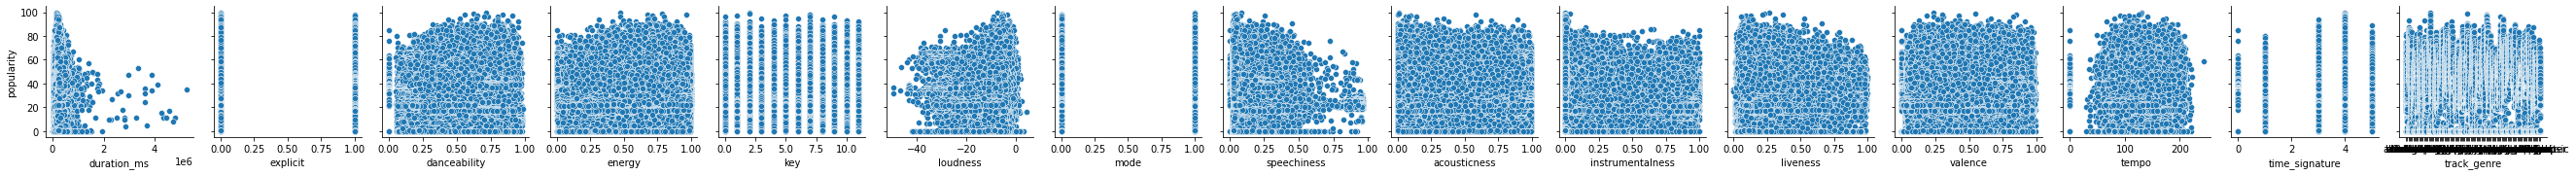

In [ ]:
sns.pairplot(song, x_vars = ['duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'], 
       y_vars = 'popularity')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f7c53e704c0>,
      dtype=object)

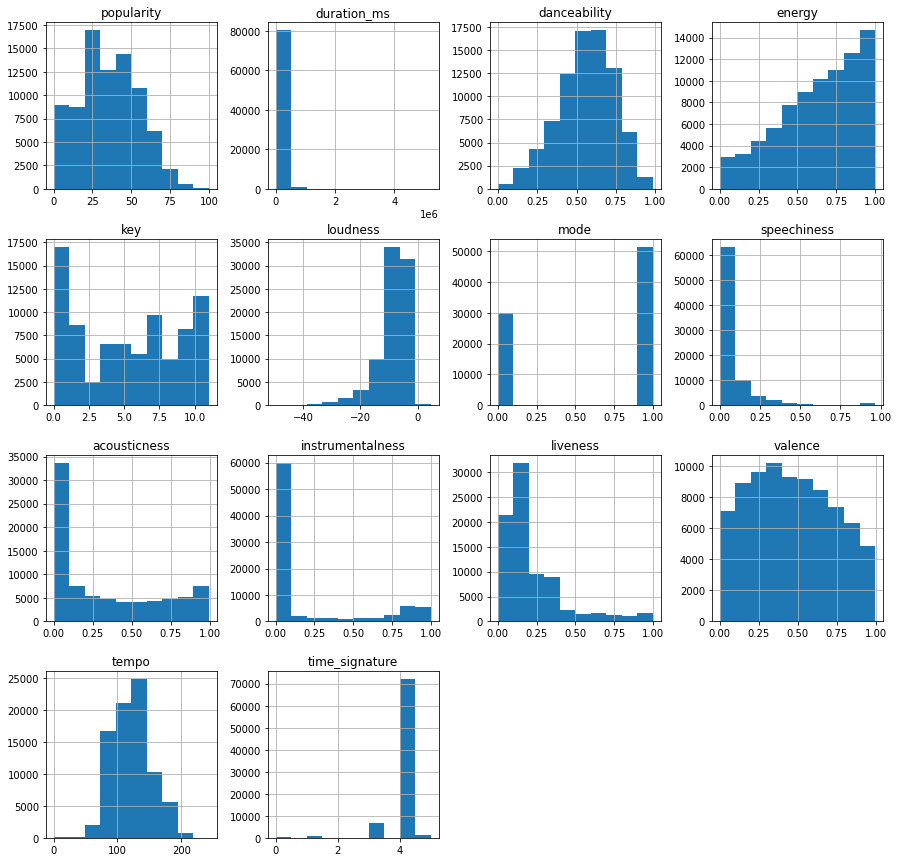

In [ ]:
song.hist(figsize = (15, 15))

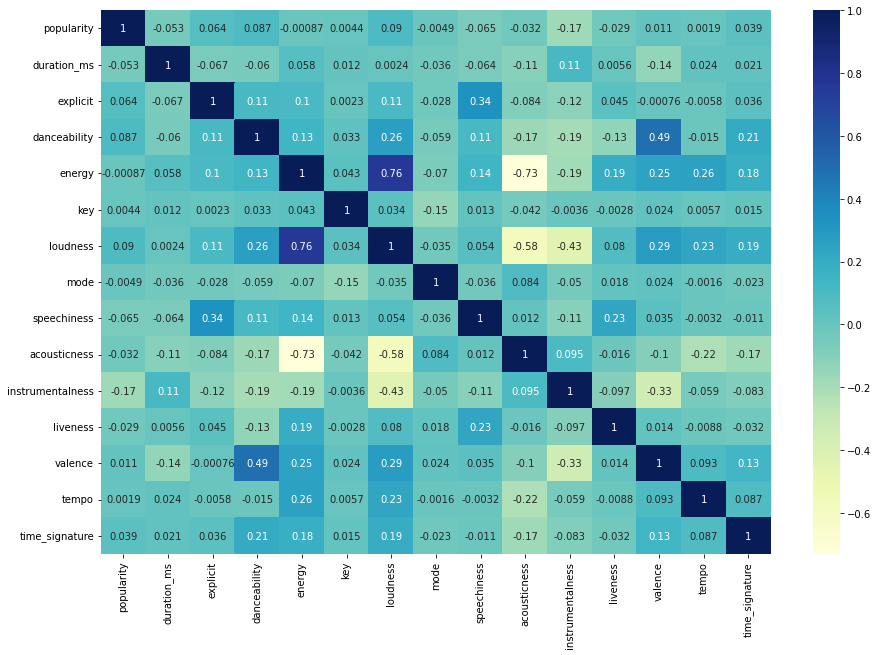

In [ ]:
fig, ax = plt.subplots(figsize= (15, 10))
sns.heatmap(song.corr(), cmap="YlGnBu", annot=True)

In [ ]:
#Regression 
X = song.drop('popularity', axis = 1)
y = song['popularity']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
numerical_cols = X_train.dtypes[X_train.dtypes != object].index
categorical_cols = X_train.dtypes[X_train.dtypes == object].index
# Preprocessing for numerical data
numerical_transformer = StandardScaler()

# Preprocessing for categorical data
categorical_transformer = LabelEncoder()


# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ], remainder="passthrough")

In [ ]:
LR = LinearRegression()
RFR = RandomForestRegressor(max_depth = 10)
XGR = XGBRegressor(n_estimators=1000, 
                      reg_alpha = 0.3,
                      max_depth=10)

models = [LR, RFR, XGR]

In [ ]:
from sklearn.model_selection import cross_val_score

def foldcvs_model(model, X, y, fold = 5):
  pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
  cvs = cross_val_score(pipeline, X, y, cv = fold)
  print(f'Model: {model}\n Cross validation mean = {cvs.mean().round(2)}')

In [ ]:
for model in models:
  foldcvs_model(model, X_train, y_train, fold = 5)

In [ ]:
def model_metrics(model, X_test, y_test, decimals = 5, X_train = X_train, y_train = y_train):
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    mse = np.round(mean_squared_error(y_test, y_pred),decimals)
    r2 = np.round(r2_score(y_test, y_pred),decimals)
    return {'mean_squared_error': mse, 'R-Squared': r2}

In [ ]:
results = pd.DataFrame(
    [
        model_metrics(LR, X_test, y_test),
        model_metrics(RFR, X_test, y_test),
        model_metrics(XGR, X_test, y_test),
    ], 
    index = ['LinearRegressor', 'RandomForestRegressor', 'XGBRegressor']) \
    .reset_index() \
    .rename(columns={'index':'model'})

[08:22:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
results.sort_values(['mean_squared_error', 'R-Squared'],
              ascending = [True, False])

,model,mean_squared_error,R-Squared
2,XGBRegressor,229.65951,0.39301
0,LinearRegressor,232.27694,0.38609
1,RandomForestRegressor,292.15949,0.22782


All of models did not work well to predict popularity. 
To solve this problem, maybe 
- artist and album columns should be included into features (actually, I tried to add artist to the features, 
  but I got an error while I was doing cross-validation)
- adjust hyperparameters of each model  

## 3. Clustering and Recommendation system

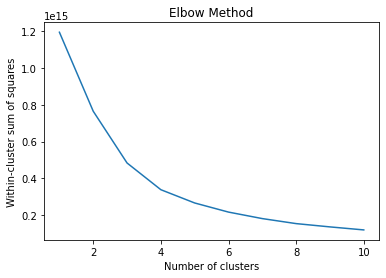

In [ ]:
# Find the best number of group using elbow method
from sklearn.cluster import KMeans

X = df2.select_dtypes(np.number)

# Create an empty list to store within-cluster sum of squares (WCSS) for each k value
wcss = []

# Create an empty list to store the number of clusters (k value)
k_range = range(1, 11)

# Loop through each k value
for k in k_range:
    # Create a KMeans instance with the current k value
    kmeans = KMeans(n_clusters=k, init='k-means++', max_iter=300, n_init=10, random_state=0)
    # Fit the KMeans model to the data
    kmeans.fit(X)
    # Append the WCSS for the current k value to the WCSS list
    wcss.append(kmeans.inertia_)

# Plot the WCSS values against the number of clusters
plt.plot(k_range, wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.show()

In [ ]:
#Recommendation system

X = df2.select_dtypes(np.number)
Scale = StandardScaler()
Kmean = KMeans(n_clusters=10, verbose=False) # if following elbow method, it should be 4 groups, but I want to set 10 clusters

cluster_pipeline = Pipeline([('scaler', Scale), 
                             ('kmeans', Kmean)])

number_cols = list(X.columns)
cluster_pipeline.fit(X)
df2['cluster'] = cluster_pipeline.predict(X)

In [ ]:
# Visualizing the Clusters with PCA

from sklearn.decomposition import PCA
import plotly.express as px 

pca_pipeline = Pipeline([('scaler', Scale), ('PCA', PCA(n_components=2))])
song_embedding = pca_pipeline.fit_transform(X)
projection = pd.DataFrame(columns=['x', 'y'], data=song_embedding)
projection['title'] = df2['track_name']
projection['cluster'] = df2['cluster']

fig = px.scatter(
    projection, x='x', y='y', color='cluster', hover_data=['x', 'y', 'title'])
fig.show()

Output hidden; open in https://colab.research.google.com to view.

In [ ]:
def SongRecommender(df, track_name):
    song_name = set()
    cluster = df.loc[df['track_name'] == track_name]['cluster'].values[0]
    for i in range(len(df)):
      if df.loc[i, 'cluster'] == cluster:
        song_name.add(df.loc[i, 'track_name'])
    
    return pd.DataFrame(song_name)

In [ ]:
SongNames = SongRecommender(df2, 'Tip Tip Barsa Paani')
SongNames.sample(10)

,0
4836,Som en rastaman
10273,Nega / Insana - Ao Vivo
6115,NIGHT FLIGHT
4828,I Can
6751,Losing Lisa
10238,El Viajero
4660,Freitag Samstag Dicht
1001,Love Talk - English Version
6920,Kriegsberichte
4274,Mir sin Kölsche
